In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Загрузка и изучение данных

In [35]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()

In [36]:
print("Ключи digits_dataset: \n{}".format(digits_dataset.keys()))

Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [37]:
print(digits_dataset['DESCR'][:3000] + "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [38]:
print("Названия ответов: {}".format(digits_dataset['target_names']))

Названия ответов: [0 1 2 3 4 5 6 7 8 9]


In [39]:
print("Названия признаков: \n{}".format(digits_dataset['feature_names']))

Названия признаков: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [40]:
print("Тип массива data: {}".format(type(digits_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [41]:
print("Форма массива data: {}".format(digits_dataset['data'].shape))

Форма массива data: (1797, 64)


In [42]:
print("Первые пять (1797) строк массива data:\n{}".format(digits_dataset['data'][:1797]))

Первые пять (1797) строк массива data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [43]:
print("Тип массива target: {}".format(type(digits_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [44]:
print("Форма массива target: {}".format(digits_dataset['target'].shape))

Форма массива target: (1797,)


In [45]:
print("Ответы:\n{}".format(digits_dataset['target']))

Ответы:
[0 1 2 ... 8 9 8]


## Метрики эффективности: обучающий и тестовые наборы

In [46]:
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'],  random_state=0)

In [47]:
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива x_train: (1347, 64)
форма массива y_train: (1347,)


In [48]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (450, 64)
форма массива y_test: (450,)


## Исследование данных. Визуализация

<Figure size 640x480 with 0 Axes>

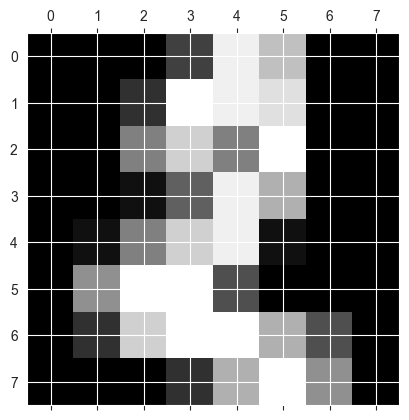

In [49]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits_dataset.images[2])
plt.show()

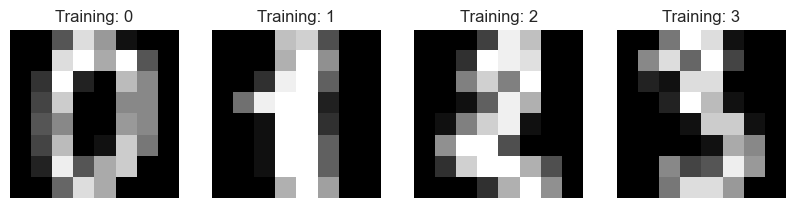

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits_dataset.images, digits_dataset.target):
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    ax.axis("off") 
plt.show()

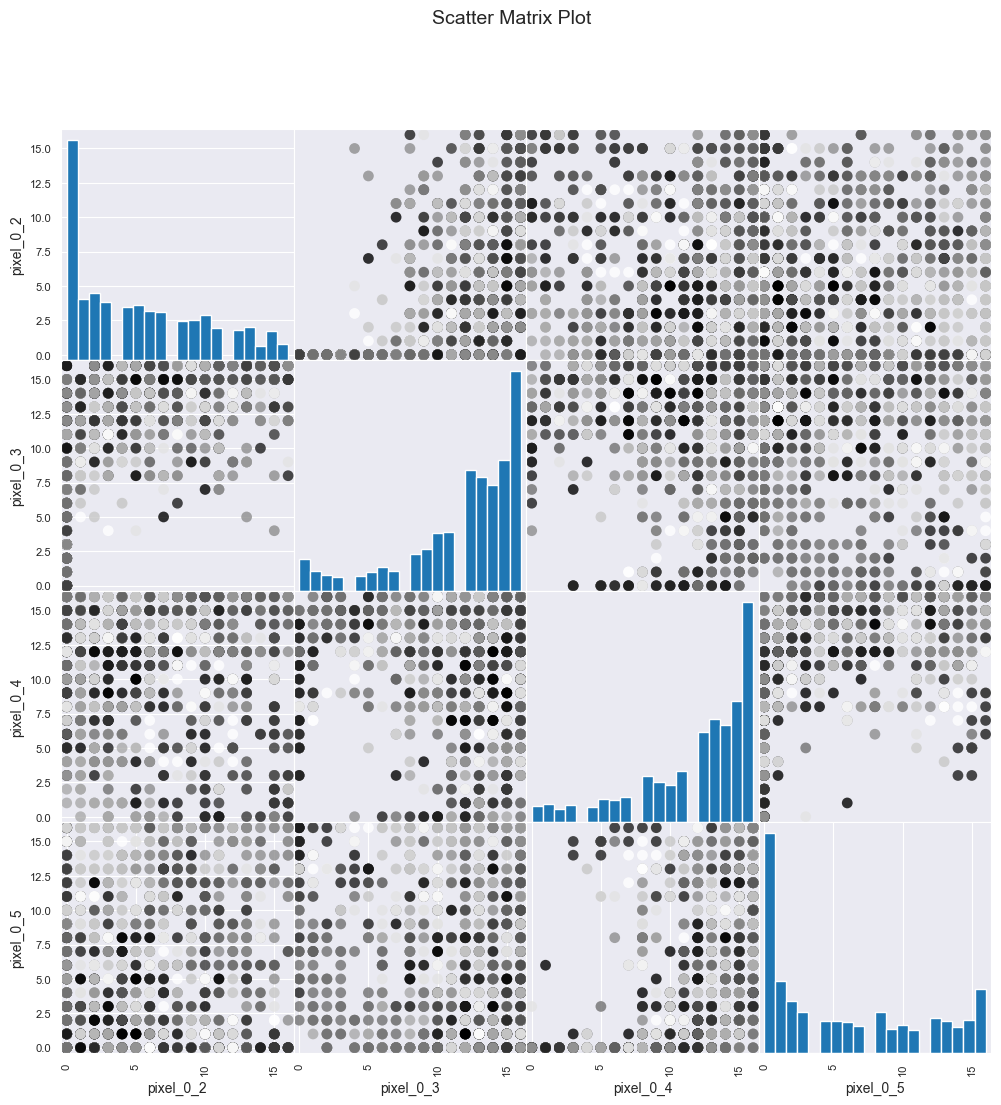

In [51]:
from pandas.plotting._matplotlib import scatter_matrix
import pandas as pd

digits_dataset = pd.DataFrame(X_train, columns=digits_dataset.feature_names)
selected_features = ['pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5'] 
selected_data = digits_dataset[selected_features]

scatter_matrix(selected_data, c=y_train, figsize=(12, 12), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.suptitle('Scatter Matrix Plot', fontsize=14)
plt.show()

## Построение модели методом k-ближайших средних

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Получение прогнозов

In [83]:
import numpy as np
digits_dataset = load_digits()
X_new = np.array([[0.0,0.4, 0.0, 0.0, 0.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 16.0, 0.0, 13.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 3.0, 4.0, 5.0, 6.0]])

print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 64)


In [84]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(digits_dataset['target_names'][prediction]))

Прогноз: [9]
Спрогнозированная метка: [9]


## Оценка качества модели

In [85]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


In [86]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.98


In [87]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.98


## Вывод
Датасет load_digits представляет собой изображения рукописных цифр от 0 до 9, каждая изображение размером 8x8 пикселей. Этот датасет используется для задачи классификации, где необходимо определить, какая цифра изображена на каждом изображении.

В процессе исследования данных были выполнены следующие шаги:

1. Изучение данных: Датасет содержит изображения цифр и соответствующие метки классов. Обучающий набор содержит 1347 изображений, а тестовый набор содержит 450 изображений.

2. Визуализация данных: Изображения цифр были визуализированы для лучшего понимания данных. Построены матрицы диаграмм рассеяния для некоторых выбранных признаков.

3. Построение модели k-ближайших соседей (k-NN): Модель k-NN была построена на обучающем наборе. В данном случае использовалось значение k=2.

4. Прогнозирование на новых данных: Модель была протестирована на новых данных, представляющих изображение цифры. По введенным данным модель успешно предсказывает соответствующую цифру.

5. Оценка качества модели: Модель была оценена на тестовом наборе данных. Точность модели на тестовом наборе составила около 98%.

Датасет load_digits представляет собой хороший пример для задачи распознавания рукописных цифр, и модель k-NN показала хорошие результаты на этом наборе данных.